In [1]:
"""
jupyter-nbconvert report_arch.ipynb --to python
python -u report_arch.py --expt_dir ~/plume/plumezoo/latest/fly/memory/
"""

'\njupyter-nbconvert report_arch.ipynb --to python\npython -u report_arch.py --expt_dir ~/plume/plumezoo/latest/fly/memory/\n'

In [2]:
from __future__ import division
import os
import glob
import pickle
from natsort import natsorted
import argparse
import os
import sys
import numpy as np
import tqdm
import pandas as pd

import numpy as np
from pprint import pprint
import glob
import sys
sys.path.append('../')
from plume_env import PlumeEnvironment, PlumeFrameStackEnvironment
import config
import agents
import agent_analysis
import os
import sklearn
import sklearn.decomposition as skld

import importlib
import log_analysis
importlib.reload(log_analysis)
import torch

import arch_utils as archu
from statannot import add_stat_annotation # https://stackoverflow.com/questions/36578458/how-does-one-insert-statistical-annotations-stars-or-p-values-into-matplotlib/37518947#37518947



In [3]:
import sys
batchmode = False
if 'ipykernel_launcher' in sys.argv[0]:
    print("Interactive mode")
else:
    batchmode = True
    print("Batch/CLI mode")
    import argparse

Interactive mode


In [4]:
# Common
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

from IPython.display import clear_output
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set(style="white")
# print(plt.style.available)

mpl.rcParams['figure.dpi'] = 100
dpi_save = 300
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 10}
matplotlib.rc('font', **font)
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']

# matplotlib.rc('font', **{'family': 'sans-serif', 
#                          'sans-serif': 'Arial', 
#                          'weight': 'normal', 
#                          'size': 9})

# Interactive vs. CLI
if not batchmode:
    %matplotlib inline
    # %config InlineBackend.figure_format = 'svg'
    %config InlineBackend.figure_format = 'retina'
else:
    matplotlib.use("Agg")
    

In [5]:
if batchmode:
    parser = argparse.ArgumentParser(description='')
    parser.add_argument('--model_dir', default=None)
    args = parser.parse_args()
    print(args)
    
    model_dir = args.model_dir
else:
    model_dir = natsorted(glob.glob(f'/home/satsingh/plume/plumezoo/latest/fly/memory/*VRNN*/'))[0]
#     model_dir = '/home/satsingh/plume/plumezoo/20210506/fly_all/memory/plume_20210418_VRNN_constantx5b5noisy6x5b5_bx1.0_t1M_w3_stepoob_h64_wd0.01_codeVRNN_seed19507d3/'
    # model_dir = '/home/satsingh/plume/plumezoo/20210504/fly/memory/plume_20210418_VRNN_constantx5b5noisy6x5b5_bx1.0_t1M_w3_stepoob_h64_wd0.01_codeVRNN_seed19507d3/'
    # model_dir = '/home/satsingh/plume/plumezoo/latest/fly/memory/plume_20210507_VRNN_constantx5b5noisy3x5b5_stepoobstray_bx0.30.8_t5000004000000_q2.01.0_h64_wd0.01_n4_codeVRNN_seed2106602/'

outdir = f'{model_dir}/report_arch/'
os.makedirs(outdir, exist_ok=True)

In [6]:
model_fname = model_dir[:-1] + ".pt"
model_fname
# models = natsorted(glob.glob(f'{expt_dir}/*VRNN*.pt'))
# assert len(models) > 0
# models
# models = ['/home/satsingh/plume/plumezoo/20210506/fly_all/memory/plume_20210418_VRNN_constantx5b5noisy6x5b5_bx1.0_t1M_w3_stepoob_h64_wd0.01_codeVRNN_seed19507d3.pt']

'/home/satsingh/plume/plumezoo/latest/fly/memory/plume_20210601_VRNN_constantx5b5noisy3x5b5_stepoob_bx0.30.8_t10000004000000_q2.00.5_dmx0.80.8_dmn0.70.4_h64_wd0.0001_n4_codeVRNN_seed3307e9.pt'

# Architecture: Connectivity matrix
Seems to only work for Vanilla RNN

Saved: /home/satsingh/plume/plumezoo/latest/fly/memory/plume_20210601_VRNN_constantx5b5noisy3x5b5_stepoob_bx0.30.8_t10000004000000_q2.00.5_dmx0.80.8_dmn0.70.4_h64_wd0.0001_n4_codeVRNN_seed3307e9//report_arch//eigenspectra_3307e9.png
Saved: /home/satsingh/plume/plumezoo/latest/fly/memory/plume_20210601_VRNN_constantx5b5noisy3x5b5_stepoob_bx0.30.8_t10000004000000_q2.00.5_dmx0.80.8_dmn0.70.4_h64_wd0.0001_n4_codeVRNN_seed3307e9//report_arch//timescales_3307e9.png


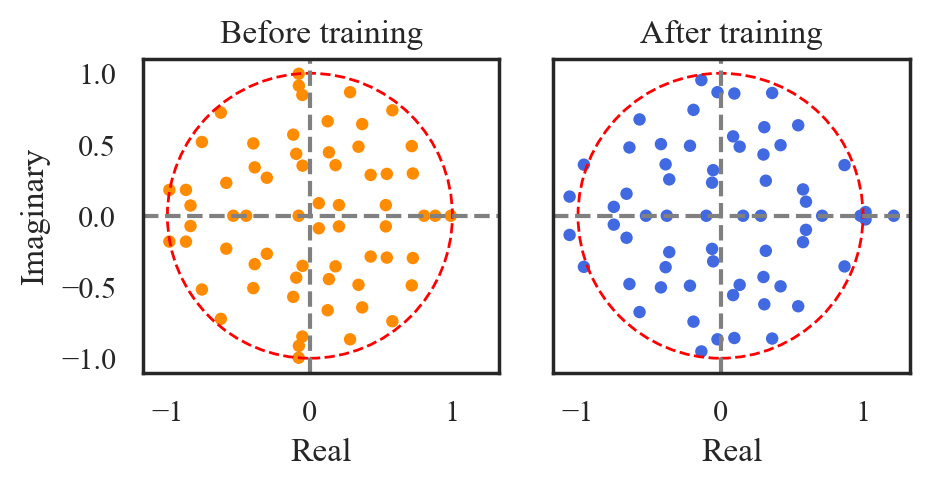

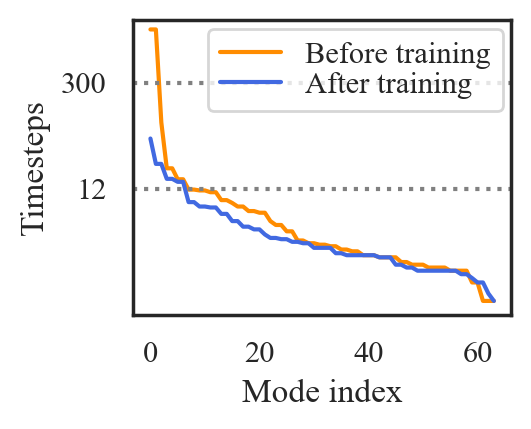

In [55]:
importlib.reload(log_analysis)
# for model_fname in models:

model_seed = model_fname.split('seed')[-1].split('.')[0]
figsize1=(4,3.5)
figsize1=(5,4)
figsize2=(4,3.5)
#     figsize1=(config.mwidth/2, 2)
#     figsize2=(config.mwidth/2, 2)



# ---- Plot 1: Eigenspectra ---- #    
fig, axs = plt.subplots(nrows=1, ncols=2, 
                    figsize=figsize1,  
                    sharey=True, 
                        sharex=True)
try:
    J0 = archu.get_J(model_fname + '.start') # Before training
    eig_vals, eig_vecs = archu.plot_eig(J0, axs[0], title=f'Before training', dotcolor='darkorange')    
except Exception as e:
    print(e)
J = archu.get_J(model_fname) # After training
eig_vals, eig_vecs = archu.plot_eig(J, axs[1], title='After training', dotcolor='royalblue')    
axs[0].set_xlabel('Real')
axs[1].set_xlabel('Real')
axs[0].set_ylabel('Imaginary')

plt.tight_layout()
# plt.suptitle(r'Eigenvalues of \mathbf{W}_h')
fname = f"{outdir}/eigenspectra_{model_seed}.png"
plt.savefig(fname, dpi=dpi_save, bbox_inches='tight')
plt.show()
print("Saved:", fname)

# ---- Plot 2: Timescales ---- #
# Old old
#     fig, axs = plt.subplots(nrows=1, ncols=2, 
#                         figsize=figsize2,  
#                         sharey=True, 
#                             sharex=True)
#     taus_J0 = archu.get_taus(J0)
#     taus_J = archu.get_taus(J)
#     archu.plot_all_taus(taus_J0, ax=axs[0], title=f'Before [{model_seed}]')
#     archu.plot_all_taus(taus_J, ax=axs[1], title="After")
#     plt.ylim(0, 2000)
#     plt.tight_layout()
#     fname = f"{outdir}/timescales_{model_seed}.png"
#     plt.savefig(fname, dpi=dpi_save, bbox_inches='tight')
#     plt.show()
#     print("Saved:", fname)
#     periods = archu.get_periods(eig_vals)
#     print(f"Periods [{model_seed}]: {periods}")

# Old - separate plot
figsize2=(3,2.5)
plt.figure(figsize=figsize2)
taus_J0 = archu.get_taus(J0)
taus_J = archu.get_taus(J)
pd.Series(taus_J0).plot(label='Before training', c='darkorange')
pd.Series(taus_J).plot(label='After training', c='royalblue')
ax = plt.gca()
ax.set_yscale("log")
plt.ylim(0, 2000)
plt.xlabel('Mode index')
plt.ylabel('Timesteps')
plt.tight_layout()

ax.set_yticks([12, 300])
ax.set_yticklabels([12, 300])
ax.axhline(12, c='grey', linestyle=':')
ax.axhline(300, c='grey', linestyle=':')

# ax.axhline(12, c='grey', linestyle=':', label=r"$\tau$=12")
# ax.axhline(300, c='grey', linestyle='dashed', label=r"$\tau$=300")

plt.legend(loc='upper right', labelspacing=0.07, bbox_to_anchor=(1.02, 1.02))
fname = f"{outdir}/timescales_{model_seed}.png"
plt.savefig(fname, dpi=dpi_save, bbox_inches='tight')
plt.show()
print("Saved:", fname)


# plt.subplots_adjust(top=0.95) # https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib

In [8]:
# eig_vals, eig_vecs = np.linalg.eig(J)
# eig_vals[ np.imag(eig_vals) != 0 ]

# Biclustering

In [9]:
# # https://scikit-learn.org/stable/auto_examples/bicluster/plot_spectral_biclustering.html#sphx-glr-auto-examples-bicluster-plot-spectral-biclustering-py
# # TODO: Not sure how to evaluate
# from sklearn.cluster import SpectralBiclustering
# from sklearn.metrics import consensus_score

# n_clusters = 4
# model = SpectralBiclustering(n_clusters=n_clusters, 
#                              method='log',
#                              random_state=0)

# model.fit(J)
# # plt.matshow(model.biclusters_[0], cmap='RdBu')

In [10]:
# fit_data = J[np.argsort(model.row_labels_)]
# fit_data = fit_data[:, np.argsort(model.column_labels_)]

# plt.matshow(fit_data, cmap='RdBu')
# plt.colorbar()

# Eigenvalue dynamics

In [11]:
# # Random initialization Normal[0, 1/sqrt(N)]
# J = np.random.normal(size=(64, 64), loc=0, scale=1./np.sqrt(64))
# # J = np.random.normal(size=(64, 64))
# # plot_J(J)
# plot_eig(J)    
# # plot_hist(J)

In [12]:
# fig, axs = plt.subplots(nrows=1, ncols=2, 
# #                             constrained_layout=True,
#                     figsize=(5,3),  
#                     sharey=True, 
#                         sharex=True)

# # Before training
# try:
#     J0 = archu.get_J(model_fname + '.start')
#     archu.plot_eig(J0, axs[0], title='Before')    
# #         plot_J(J)
# #         plot_hist(J)
# except Exception as e:
#     print(e)

# # After training
# J = archu.get_J(model_fname)
# archu.plot_eig(J, axs[1], title='After')    
# #     plot_J(J)
# #     plot_hist(J)
# taus = archu.get_taus(J)

# # Common 
# seed = model_fname.split('seed')[-1].split('.')[0]
# #     fig.suptitle(f"[ID:{model_seed}] Eigenspectra + Timescales {taus} ")
# plt.tight_layout()
# #     plt.subplots_adjust(top=0.95) # https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib
# fname = f"{outdir}/eigenspectra_{model_seed}.png"
# plt.savefig(fname, dpi=dpi_save)
# plt.show()
# print("Saved:", fname)

# # Timescales
# fig, axs = plt.subplots(nrows=1, ncols=2, 
#                     figsize=(5,2.5),  
#                     sharey=True, 
#                         sharex=True)
# archu.plot_all_taus(J0, ax=axs[0], title="Before")
# archu.plot_all_taus(J, ax=axs[1], title="After")
# plt.show()
# plt.tight_layout()
# #     plt.subplots_adjust(top=0.95) # https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib
# fname = f"{outdir}/timescales_{model_seed}.png"
# plt.savefig(fname, dpi=dpi_save)
# plt.show()
# print("Saved:", fname)


In [13]:
eig_vals, eig_vecs = np.linalg.eig(J)
# eig_vals[ np.imag(eig_vals) != 0 ]
eig_vals[ np.linalg.norm(eig_vals) > 1 ]

ev = 1.0121603 +0.28471j
angular_velocity_degrees = np.angle(ev)*180/np.pi
period = 360/angular_velocity_degrees
period = 2*np.pi/np.angle(ev)
angular_velocity_degrees, period


(15.71073169789404, 22.91427330836899)

## Jacobian Animation

(array([ 1.215957  +0.j        , -1.0592183 +0.13457221j,
        -1.0592183 -0.13457221j, -0.9588295 +0.35858968j,
        -0.9588295 -0.35858968j,  1.017955  +0.02581135j,
         1.017955  -0.02581135j,  0.98196703+0.j        ,
         0.87032026+0.35557628j,  0.87032026-0.35557628j,
         0.362478  +0.86163265j,  0.362478  -0.86163265j,
        -0.1344525 +0.9520541j , -0.1344525 -0.9520541j ,
         0.09692493+0.8578805j ,  0.09692493-0.8578805j ,
        -0.02127152+0.86701435j, -0.02127152-0.86701435j,
        -0.56825846+0.67594206j, -0.56825846-0.67594206j,
         0.5451303 +0.63499486j,  0.5451303 -0.63499486j,
        -0.18967113+0.74310523j, -0.18967113-0.74310523j,
        -0.6393295 +0.47911364j, -0.6393295 -0.47911364j,
         0.30726022+0.62148255j,  0.30726022-0.62148255j,
         0.7132358 +0.j        ,  0.42136505+0.49530438j,
         0.42136505-0.49530438j,  0.5788662 +0.1849133j ,
         0.5788662 -0.1849133j ,  0.59963405+0.09888119j,
         0.599

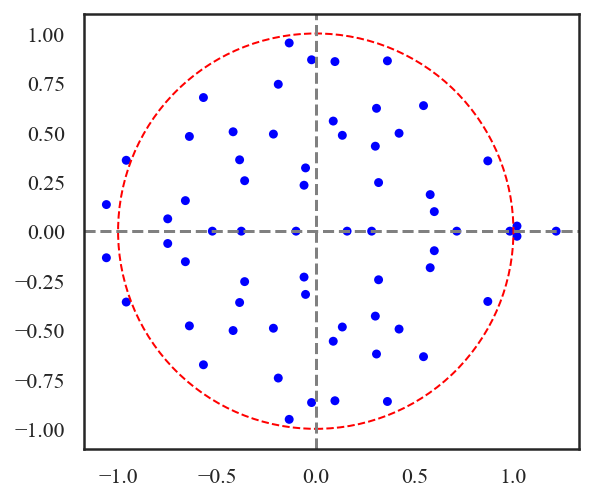

In [14]:
actor_critic, ob_rms = \
        torch.load(model_fname, map_location=torch.device('cpu'))
net = actor_critic.base.rnn #.weight_hh_l0.detach().numpy()
J0 = net.weight_hh_l0.detach().numpy()
archu.plot_eig(J0)    


Text(0.5, 1.0, 'UPR: 0.23')

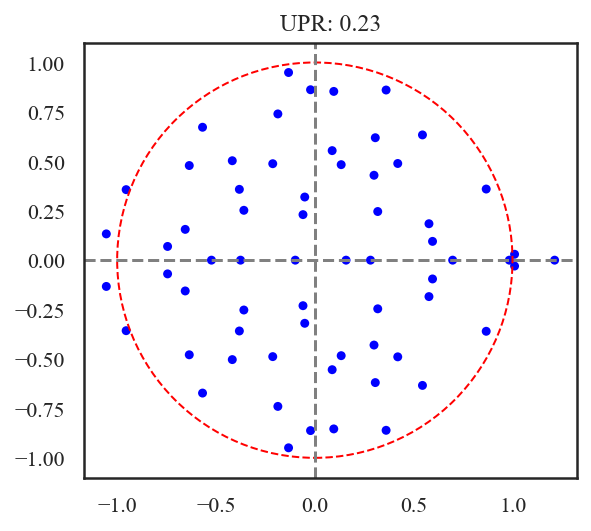

In [15]:
# J1 = Jx[1].squeeze().numpy()
# J2 = Jh[1].squeeze().numpy()
Jx, Jh = archu.get_jacobians(net, h=None, x=None)
eig_vals, eig_vecs = archu.plot_eig(Jh)

unstable_power, total_power, upr = archu.get_powers(eig_vals)
plt.title(f"UPR: {upr:.2f}")

constantx5b5


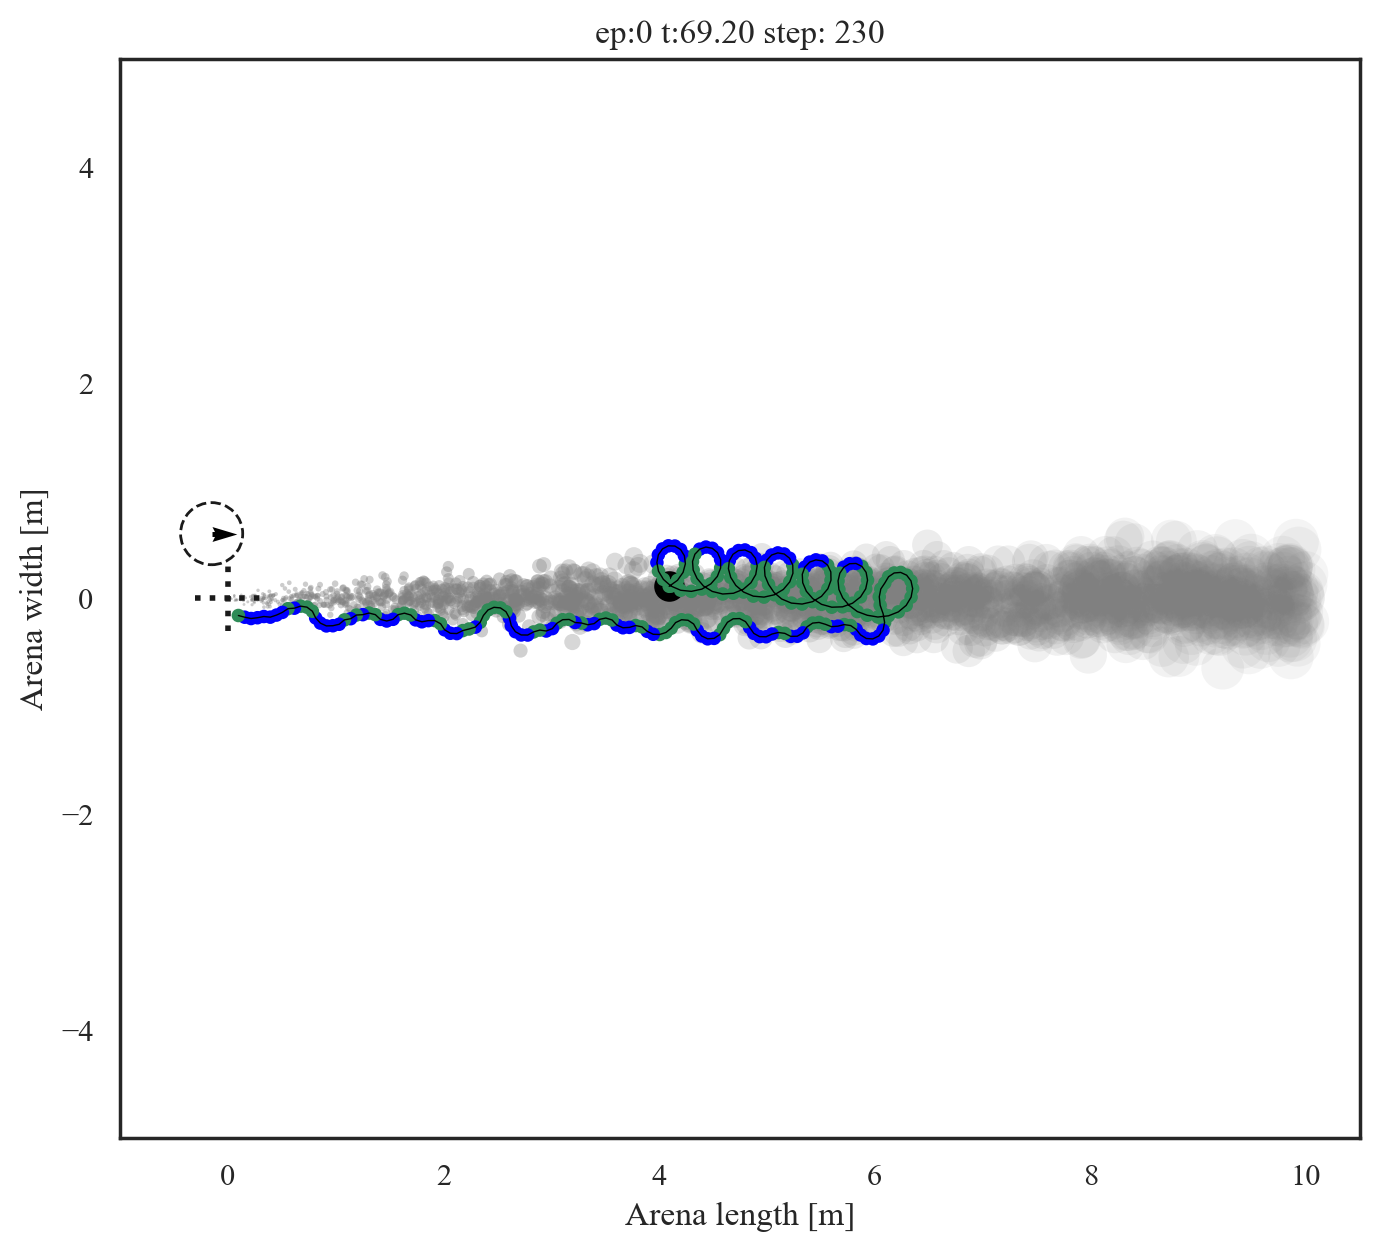

In [16]:
import arch_utils as archu
importlib.reload(archu)

# Save video for one trajectory
model_dir = model_fname.replace('.pt', '/')
is_recurrent = True if ('GRU' in model_dir) or ('VRNN' in model_dir) else False
log_fname = natsorted(glob.glob(model_dir + '*.pkl'))[0]
log_fname
with open(log_fname, 'rb') as f_handle:
    episode_logs = pickle.load(f_handle)

# Sequentially process trajectory
# ep_idx = 0
# log = episode_logs[ep_idx]
# ep_activity = log_analysis.get_activity(log, is_recurrent, do_plot=False)

for idx in range(len(episode_logs)):
    log = episode_logs[idx]
    outcome = log['infos'][-1][0]['done']
#     if outcome != 'HOME':
#         break
    if outcome == 'HOME':
        break

agent_analysis.visualize_episodes([log], 
                                  zoom=2, 
                                  dataset='constantx5b5',
                                  animate=False,
                                 )

In [17]:
eig_df = archu.get_eig_df_episode(net, log)
eig_df.head()

traj_df = log_analysis.get_traj_df(log, 
                               extended_metadata=False, 
                               squash_action=True)
eig_df['odor_01'] = traj_df['odor_01']

    
# archu.animate_Jh_episode(eig_df, fname_suffix='test', outprefix="./")

100%|██████████| 230/230 [00:11<00:00, 19.90it/s]


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

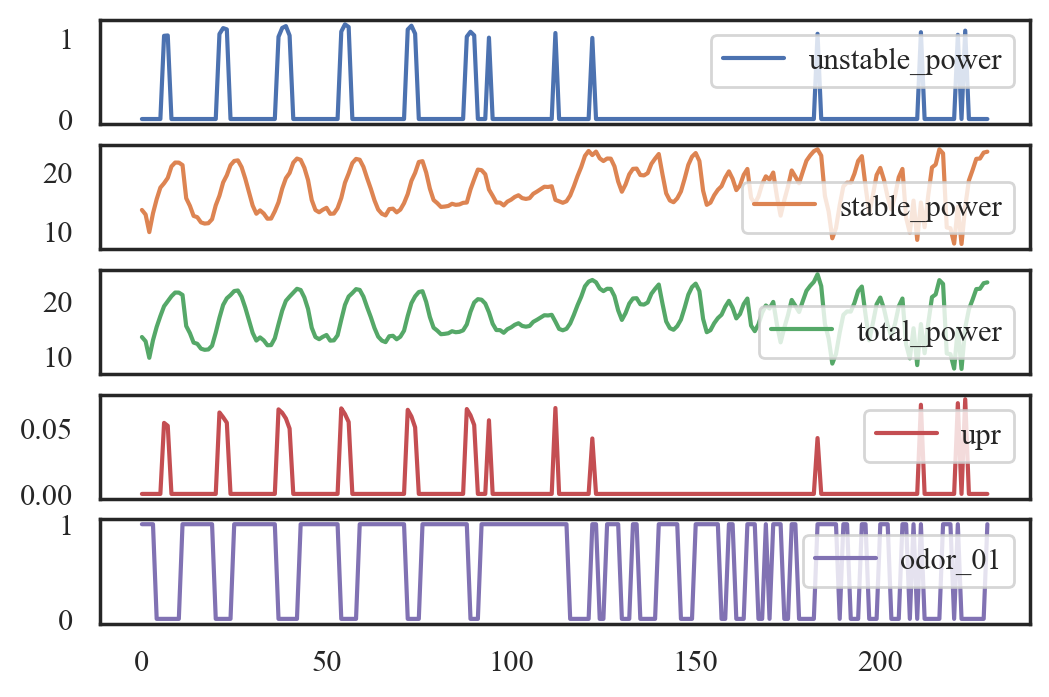

In [18]:
eig_df.columns
col_subset = ['unstable_power', 'stable_power', 'total_power', 'upr', 'odor_01']
eig_df.loc[:,col_subset].plot(subplots=True)

### Back to manuscript -- generate taus, eigs etc. over multiple episodes

In [19]:
# 1 episode of each type
use_datasets = ['constantx5b5', 'switch45x5b5', 'noisy3x5b5']
selected_df = log_analysis.get_selected_df(model_dir, 
                              use_datasets, 
                              n_episodes_home=1, 
                              n_episodes_other=1,
                              min_ep_steps=0)

total_eps = len(selected_df['idx'].unique())
total_steps = selected_df['ep_length'].sum()
print(f"total_steps: {total_steps}, total_eps: {total_eps}")
selected_df

total_steps: 1724, total_eps: 6


,dataset,idx,ep_length,log,outcome
2,constantx5b5,82,285,"{'trajectory': [[6.089736038791369, 0.00960661...",HOME
4,constantx5b5,124,295,"{'trajectory': [[6.077540508733657, 0.92021254...",OOB
0,switch45x5b5,212,288,"{'trajectory': [[8.005338071452826, 0.03315190...",HOME
5,switch45x5b5,20,272,"{'trajectory': [[3.9475154996715567, -0.274546...",OOB
1,noisy3x5b5,238,287,"{'trajectory': [[8.038751963590146, 3.70386308...",HOME
3,noisy3x5b5,137,297,"{'trajectory': [[5.9428890882062495, 1.8682330...",OOB


In [20]:
taus_episodes = []
eig_dfs_all = []
traj_dfs_all = [] 
squash_action = True
for idx, row in selected_df.iterrows():
    log = row['log']
    eig_df = archu.get_eig_df_episode(net, log)
    eig_dfs_all.append( eig_df )
    
    taus_episode = pd.DataFrame(eig_df['timescales'].to_list())
    taus_episodes.append(taus_episode)

    traj_df = log_analysis.get_traj_df(log, 
                                   extended_metadata=False, 
                                   squash_action=squash_action)
    traj_dfs_all.append( traj_df )

taus_episodes = pd.concat(taus_episodes).reset_index(drop=True)
eig_dfs_all = pd.concat(eig_dfs_all).reset_index(drop=True)
traj_dfs_all = pd.concat(traj_dfs_all).reset_index(drop=True)


100%|██████████| 297/297 [00:15<00:00, 19.76it/s]


In [21]:
taus_episodes.mean()
# yerrs = taus_episodes.std()
# taus_episodes.mean().plot()
# taus_episodes.std().plot(logy=True) # barely visible in log-axis
top5tau = taus_episodes.mean().head().to_list()
top5tau = np.around(top5tau, decimals=1)
print(f"{model_seed}: top5taus -- {top5tau}")

3307e9: top5taus -- [56.5 13.   7.7  6.8  5.8]


Saved: /home/satsingh/plume/plumezoo/latest/fly/memory/plume_20210601_VRNN_constantx5b5noisy3x5b5_stepoob_bx0.30.8_t10000004000000_q2.00.5_dmx0.80.8_dmn0.70.4_h64_wd0.0001_n4_codeVRNN_seed3307e9//report_arch//timescales_3307e9.png


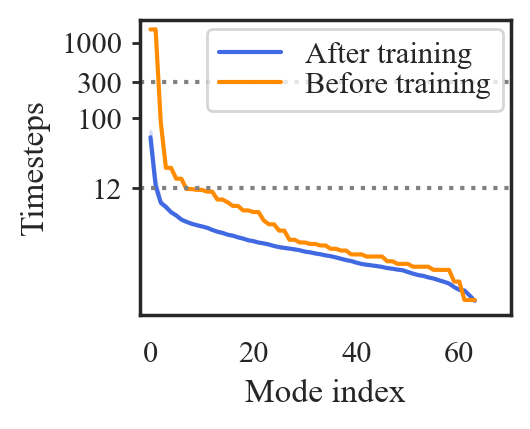

In [66]:
# Timescales plot with CI
figsize2=(3,2.5)
plt.figure(figsize=figsize2)

# taus_J0 = archu.get_taus(J0) # use the one generated at the very top

g = sns.lineplot(data=taus_episodes.melt(), 
                 x='variable', 
                 y='value', 
                 color='royalblue',
#                  label=f'After training', # main manuscript
                 label=f'After training\n[N={total_steps} E={total_eps}]', # appendices
#                  estimator=np.median,
#                  estimator=np.mean,
                 ci=99,
                )
g.set_yscale("log")

pd.Series(taus_J0).plot(label='Before training', color='darkorange')
ax = plt.gca()

ax.set_yticks([12, 100, 300, 1000])
ax.set_yticklabels([12, 100, 300, 1000])
ax.tick_params(axis='y', which='major', left=True, length=3, width=1)
ax.axhline(12, c='grey', linestyle=':')
ax.axhline(300, c='grey', linestyle=':')


# ax.axhline(12, c='grey', linestyle=':', label=r"$\tau$=12")
# ax.axhline(300, c='grey', linestyle='dashed', label=r"$\tau$=300")

plt.ylim(0, 2000)
plt.xlim(-2, 70)
plt.xlabel('Mode index')
plt.ylabel('Timesteps')
plt.tight_layout()

plt.legend(loc='upper right', labelspacing=0.07, bbox_to_anchor=(1.02, 1.02))
fname = f"{outdir}/timescales_{model_seed}.png"
plt.savefig(fname, dpi=dpi_save, bbox_inches='tight')
plt.show()
print("Saved:", fname)


In [23]:
eig_dfs_all['odor_01'] = traj_dfs_all['odor_01'].to_list()
eig_dfs_all['odor_01'] = eig_dfs_all['odor_01'].apply( lambda x : 'off' if x == 0 else 'on')
eig_dfs_all.head()
eig_dfs_all.tail()
# eig_dfs_all.reset_index(drop=True, inplace=True)

,idx,unstable_power,stable_power,total_power,upr,periods,timescales,eig_vals,Jh,odor_01
1719,292,1.061357,23.905199,24.966557,0.042511,[],"[11.9, 11.9, 10.3, 7.0, 6.6, 6.6, 5.9, 5.9, 5....","[(1.0302217+0j), (-0.8721259+0.29176947j), (-0...","[[0.10584669, 0.041187335, -0.058578018, -0.06...",off
1720,293,0.000000,23.793690,23.793690,0.000000,[],"[17.4, 17.4, 9.2, 9.2, 6.7, 6.7, 5.5, 5.5, 5.1...","[(0.94257605+0.054737937j), (0.94257605-0.0547...","[[0.10554183, 0.04106871, -0.058409303, -0.060...",off
1721,294,0.000000,22.682678,22.682678,0.000000,[],"[12.0, 12.0, 6.9, 6.9, 6.4, 6.4, 5.1, 5.1, 4.8...","[(-0.8143974+0.2897637j), (-0.8143974-0.289763...","[[0.1056167, 0.041097842, -0.05845074, -0.0601...",off
1722,295,0.000000,21.823872,21.823872,0.000000,[],"[10.4, 10.4, 6.0, 6.0, 5.6, 5.6, 4.7, 4.7, 4.7...","[(0.9058866+0.06361666j), (0.9058866-0.0636166...","[[0.106640644, 0.041496284, -0.059017412, -0.0...",off
1723,296,0.000000,21.208752,21.208752,0.000000,[],"[11.0, 11.0, 5.6, 5.6, 5.2, 5.2, 4.4, 4.4, 4.4...","[(0.91278464+0.034191377j), (0.91278464-0.0341...","[[0.107586846, 0.04186447, -0.05954106, -0.061...",on


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

on v.s. off: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.338e-01 U_stat=2.485e+05
Saved: /home/satsingh/plume/plumezoo/latest/fly/memory/plume_20210601_VRNN_constantx5b5noisy3x5b5_stepoob_bx0.30.8_t10000004000000_q2.00.5_dmx0.80.8_dmn0.70.4_h64_wd0.0001_n4_codeVRNN_seed3307e9//report_arch//eigmax_3307e9.png


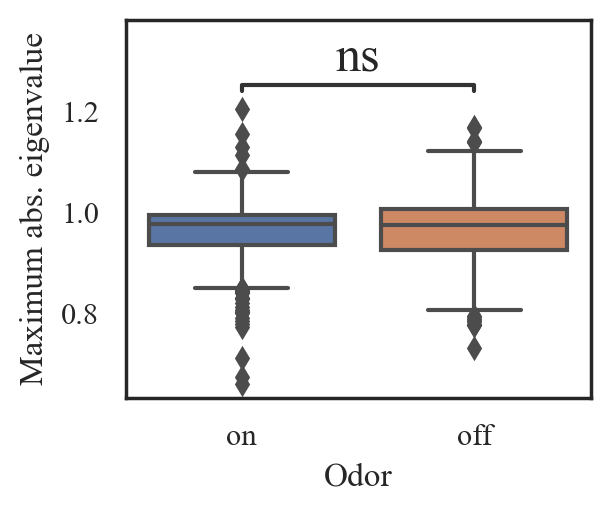

In [24]:
# Max eigenvalue vs. odor on/off
# remove grid: https://stackoverflow.com/questions/26868304/how-to-get-rid-of-grid-lines-when-plotting-with-seaborn-pandas-with-secondary
# sns.set_style("white", {'axes.grid' : False})
eig_dfs_all['eig_max'] = eig_dfs_all['eig_vals'].apply( lambda ev : np.max(np.absolute(ev)) )

# axes = eig_dfs_all.boxplot(column='eig_max', by='odor_01', figsize=figsize2, grid=False)
ax, fig = plt.subplots(figsize=figsize2)
axes = sns.boxplot(data=eig_dfs_all, x='odor_01', y='eig_max')
add_stat_annotation(axes, data=eig_dfs_all, x='odor_01', y='eig_max',
                    box_pairs=[('on','off')],
                    test='Mann-Whitney', 
                    text_format='star', 
                    loc='inside',
                    verbose=2, 
                   )

plt.title('')
plt.suptitle('')
plt.ylabel("Maximum abs. eigenvalue")
plt.xlabel("Odor")
ax = plt.gca()
# ax.set_xticklabels(['off', 'on'])

# plt.legend(loc='upper right', labelspacing=0.07, bbox_to_anchor=(1.02, 1.02))

fname = f"{outdir}/eigmax_{model_seed}.png"
plt.savefig(fname, dpi=dpi_save, bbox_inches='tight')
plt.show()
print("Saved:", fname)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

on v.s. off: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.100e-05 U_stat=2.279e+05
Saved: /home/satsingh/plume/plumezoo/latest/fly/memory/plume_20210601_VRNN_constantx5b5noisy3x5b5_stepoob_bx0.30.8_t10000004000000_q2.00.5_dmx0.80.8_dmn0.70.4_h64_wd0.0001_n4_codeVRNN_seed3307e9//report_arch//eigpower_3307e9.png


((5, 4), (3, 2.5))

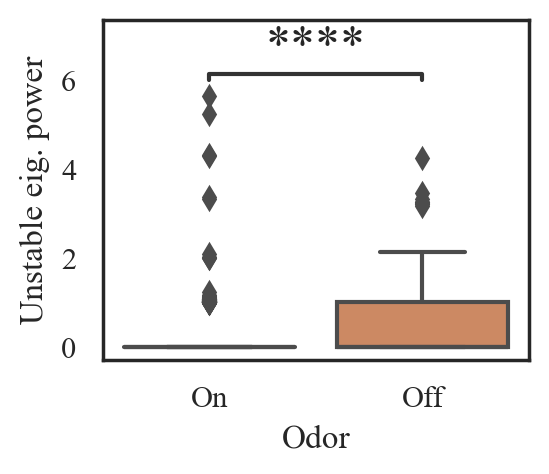

In [25]:
# Unstable eigenvalue power vs. odor on/off

# remove grid: https://stackoverflow.com/questions/26868304/how-to-get-rid-of-grid-lines-when-plotting-with-seaborn-pandas-with-secondary
# sns.set_style("white", {'axes.grid' : False})
# eig_dfs_all['n_unstable'] = eig_dfs_all['eig_vals'].apply( lambda ev : np.max(np.absolute(ev)) )

# axes = eig_dfs_all.boxplot(column='eig_max', by='odor_01', figsize=figsize2, grid=False)
ax, fig = plt.subplots(figsize=(2.75,2.25))
axes = sns.boxplot(data=eig_dfs_all, x='odor_01', y='unstable_power')
add_stat_annotation(axes, data=eig_dfs_all, x='odor_01', y='unstable_power',
                    box_pairs=[('on','off')],
                    test='Mann-Whitney', 
                    text_format='star', 
                    loc='inside',
                    verbose=2, 
                   )

plt.title('')
plt.suptitle('')
plt.ylabel("Unstable eig. power")
plt.xlabel("Odor")
ax = plt.gca()
ax.set_xticklabels(['On', 'Off'])


# # plt.legend(loc='upper right', labelspacing=0.07, bbox_to_anchor=(1.02, 1.02))

fname = f"{outdir}/eigpower_{model_seed}.png"
plt.savefig(fname, dpi=dpi_save, bbox_inches='tight')
plt.show()
print("Saved:", fname)

figsize1, figsize2

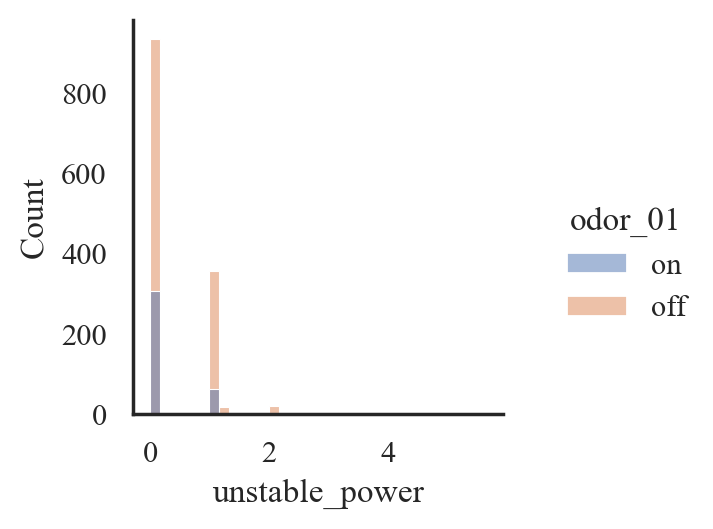

In [26]:
# ax, fig = plt.subplots(figsize=figsize2)
sns.displot(eig_dfs_all, x="unstable_power", hue="odor_01", height=figsize2[0])

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2 v.s. 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.713e-06 U_stat=1.478e+03


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


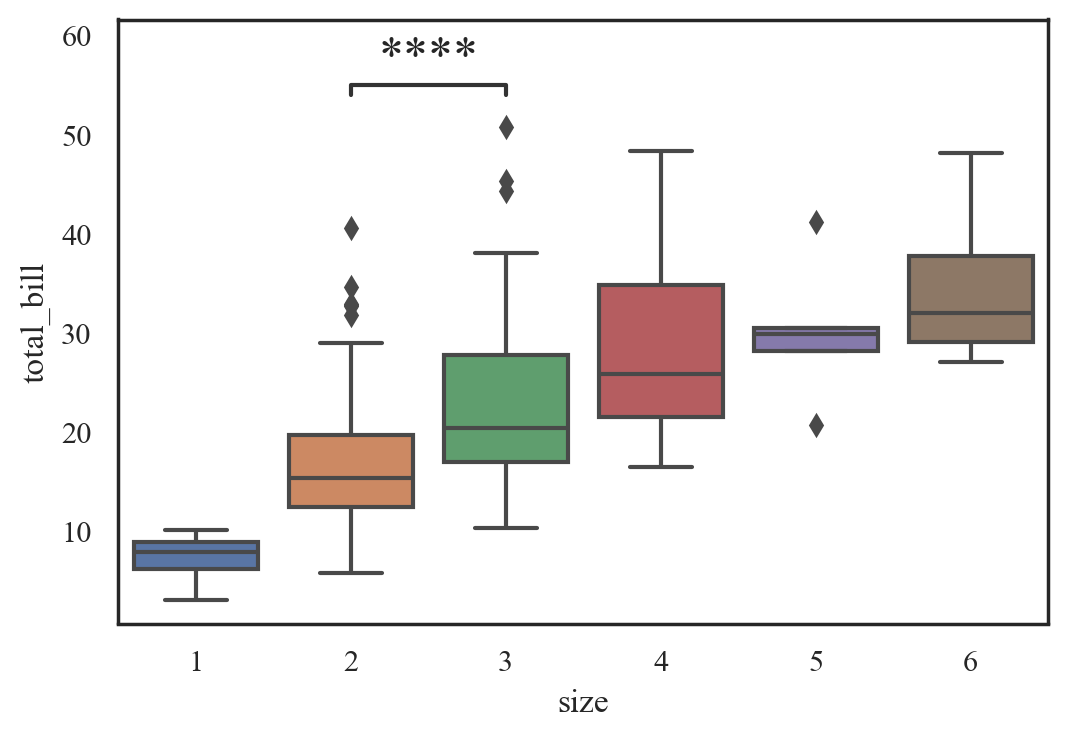

In [27]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from statannot import add_stat_annotation
# https://stackoverflow.com/questions/36578458/how-does-one-insert-statistical-annotations-stars-or-p-values-into-matplotlib/37518947#37518947
# sns.set(style="whitegrid")
df = sns.load_dataset("tips")

x = "size"
y = "total_bill"
ax = sns.boxplot(data=df, x=x, y=y)
add_stat_annotation(ax, data=df, x=x, y=y,
                    box_pairs=[(2, 3)],
#                     box_pairs=[("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

df

In [28]:
# plot_columns = ['total_power', 'stable_power', 'unstable_power', 'upr']
# axs = eig_df.loc[:,plot_columns].plot(subplots=True, figsize=(10, 4))
# for ax in axs:
#     ax.legend(loc='lower left')
# eig_df.columns

Saved: .//evprojections_test.png


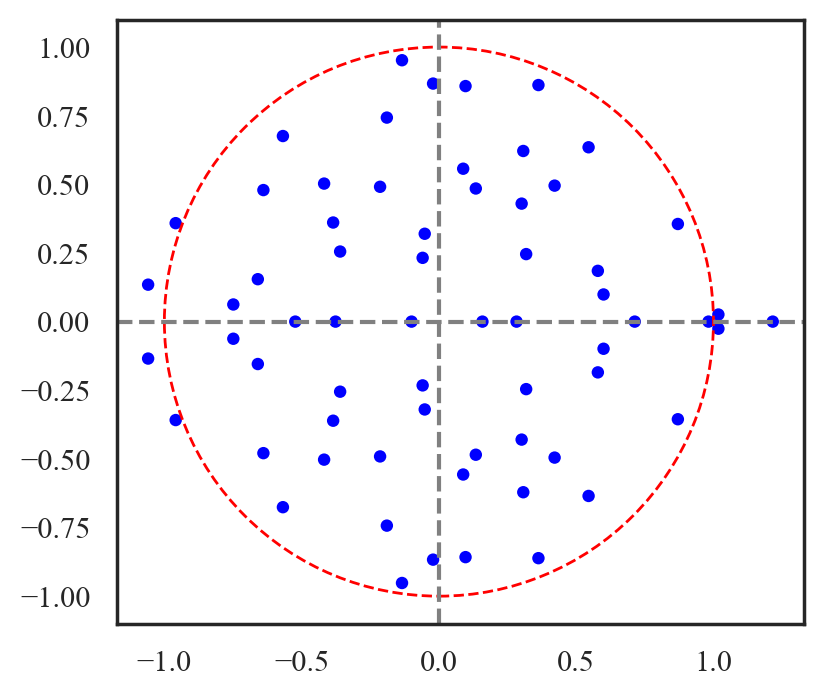

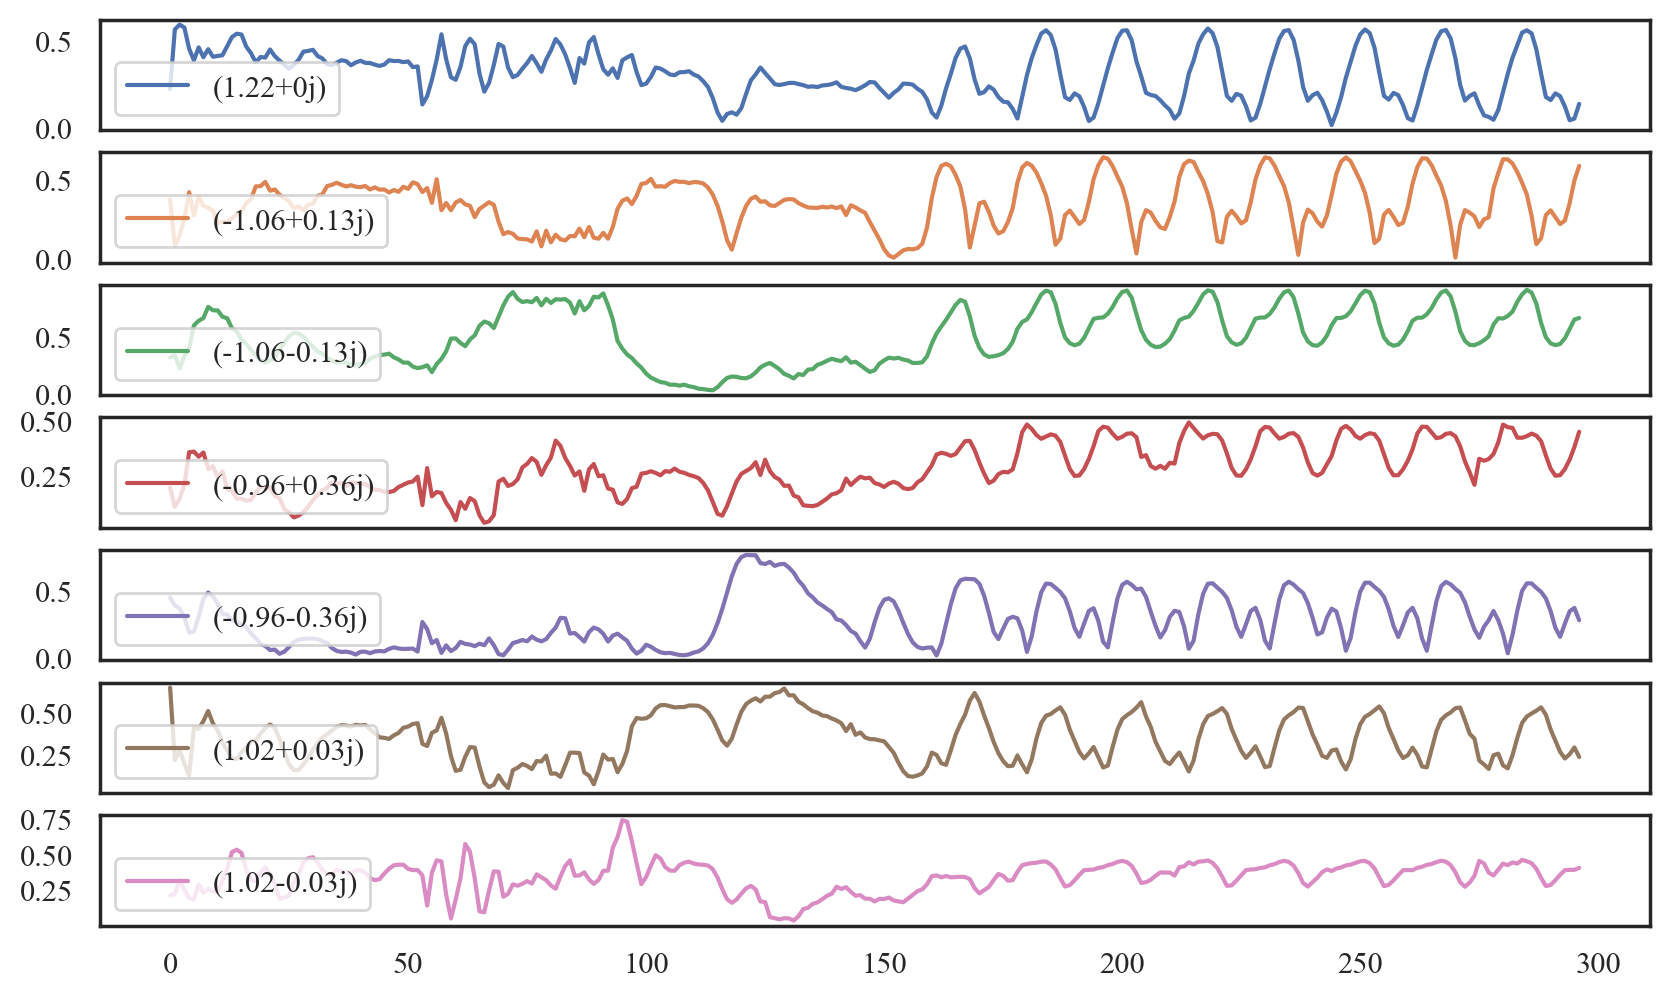

In [29]:
# # Eigenvector projections
ep_activity = log_analysis.get_activity(log, is_recurrent=True, do_plot=False)
# J0 = net.weight_hh_l0.detach().numpy()
eig_vals, eig_vecs = archu.plot_eig(J0)

# Jx, Jh = archu.get_jacobians(net, h=None, x=None)
# eig_vals, eig_vecs = archu.plot_eig(Jh)

# eligible_idxs = np.absolute(eig_vals) > 1.0
# evecs_unstable = eig_vecs[ eligible_idxs ]
# evecs_unstable.shape, ep_activity.shape

# projections = evecs_unstable @ ep_activity.T
# proj_df = np.absolute(pd.DataFrame(projections.T))
# proj_df.columns = [str(np.around(x, decimals=2)) for x in eig_vals[eligible_idxs] ]
# axs = proj_df.plot(subplots=True, figsize=(12, 6))

# for i in range(len(axs)):
#     axs[i].set_label(['A'])
#     axs[i].legend(loc='lower left')
    
# plt.savefig()
# # plt.titles("Neural activity projected onto ")
# # np.absolute(proj_df.head())

archu.plot_eigvec_projections(eig_vals, eig_vecs, ep_activity, 
    fname_suffix='test', outprefix="./")

Index(['loc_x', 'loc_y', 't_val', 'wind_theta_obs', 'wind_x_obs', 'wind_y_obs',
       'step', 'turn', 'odor_obs', 'stray_distance', 'odor_01', 'odor_clip',
       'odor_lastenc', 'regime', 'agent_angle_ground', 'wind_angle_ground',
       'wind_speed_ground', 't_val_norm', 'odor_enc_2', 'odor_enc_4',
       'odor_enc_6', 'odor_enc_8', 'odor_enc_10', 'odor_enc_12', 'odor_enc_14',
       'odor_enc_16', 'odor_enc_18', 'odor_ewm', 'odor_ewm_2', 'odor_ewm_4',
       'odor_ewm_6', 'odor_ewm_8', 'odor_ewm_10', 'odor_ewm_12', 'odor_ewm_14',
       'odor_ewm_16', 'odor_ewm_18', 'odor_ma', 'odor_ma_2', 'odor_ma_4',
       'odor_ma_6', 'odor_ma_8', 'odor_ma_10', 'odor_ma_12', 'odor_ma_14',
       'odor_ma_16', 'odor_ma_18', 'odor_lastenc_norm', 'radius', 'r_step',
       'loc_x_dt1', 'loc_y_dt1', 'wind_theta_obs_dt1', 'odor_obs_dt1',
       'odor_01_dt1', 'odor_clip_dt1', 'odor_lastenc_dt1', 'radius_dt1',
       'stray_distance_dt1', 'r_step_dt1', 'agent_angle_ground_dt1',
       'wind_angle_gro

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

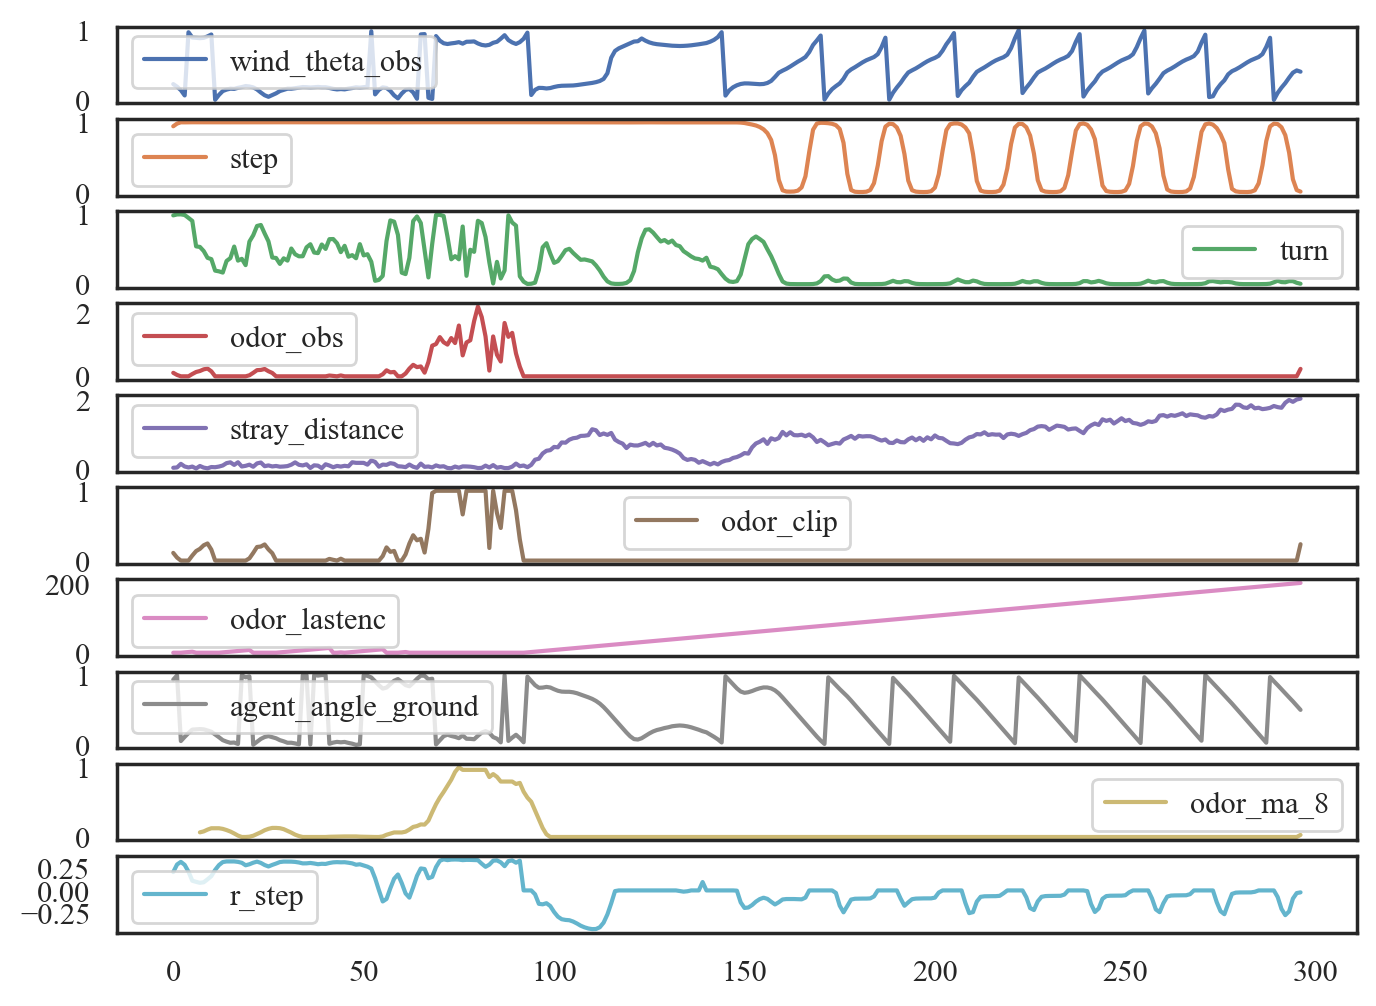

In [30]:
squash_action = True
traj_df = log_analysis.get_traj_df(log, 
                extended_metadata=True, squash_action=squash_action)

print(traj_df.columns)
plot_cols = ['wind_theta_obs', 
#              'wind_x_obs', 
#              'wind_y_obs', 
             'step', 
             'turn',
             'odor_obs',
             'stray_distance', 
#              'odor_01', 
             'odor_clip',
             'odor_lastenc',
#              'wind_speed_ground',
#              'wind_angle_ground',
             'agent_angle_ground',
             'odor_ma_8',
             'r_step',
            ]

traj_df.loc[:, plot_cols].plot(subplots=True, figsize=(8,6))

In [31]:
# # Choose random subset of RNN states from all HOME/!HOME states
# model_dir = model_fname.replace('.pt', '/')
# is_recurrent = True if ('GRU' in model_dir) or ('VRNN' in model_dir) else False
# log_fname = natsorted(glob.glob(model_dir + '*.pkl'))[0]
# log_fname
# with open(log_fname, 'rb') as f_handle:
#     episode_logs = pickle.load(f_handle)
# h_episodes = []
# for idx in range(len(episode_logs)):
#     log = episode_logs[idx]
#     outcome = log['infos'][-1][0]['done']
# #     if outcome == 'HOME':
#     if outcome != 'HOME':
#         ep_activity = log_analysis.get_activity(log, is_recurrent, do_plot=False)
#         h_episodes.append(ep_activity)
    
# h_episodes_stacked = np.vstack(h_episodes)
# h_episodes_stacked.shape

# # select random subset
# max_hxs = 500
# max_hxs = min(max_hxs, h_episodes_stacked.shape[0])
# h_idxs = np.random.choice(h_episodes_stacked.shape[0], size=max_hxs, replace=False).astype(int)
# Jhs = []
# periods_list = []
# timescales_list = []
# for h_idx in tqdm.tqdm(h_idxs):
#     h = torch.tensor(h_episodes_stacked[h_idx,:].reshape(1, 1, -1), requires_grad=True)    
#     Jx, Jh = get_jacobians(net, h=h, x=None)
#     Jhs.append( Jh )
    
#     timescales_list.append( get_taus(Jh) )
#     eig_vals, eig_vecs = np.linalg.eig(Jh)
#     periods_list.append( get_periods(eig_vals) )
# #     plot_eig(Jh)
# len(Jhs)

In [32]:
# Jhs
# periods_list
# timescales_list
# periods_list_flat = np.concatenate(flatten(periods_list))
# pd.Series(periods_list_flat).hist(bins=100)
# plt.xlim(0,50)

In [33]:
# np.histogram(periods_list_flat)

In [34]:
# flatten(timescales_list)